# Introduction to neural network classification with TensorFlow

In this notebook, we are going to learn how to write nearal networks for classification problems.

A classification is where you try to classify someting as one thing or another. 

There are three type of classification:
* Binary classification
* Multiclass classification 
* Multilabel classification

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand, right now. So, let's visualize it.

In [5]:
# Import pandas
import pandas as pd

# Create a dataframe
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'labels': y})
circles.head()

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


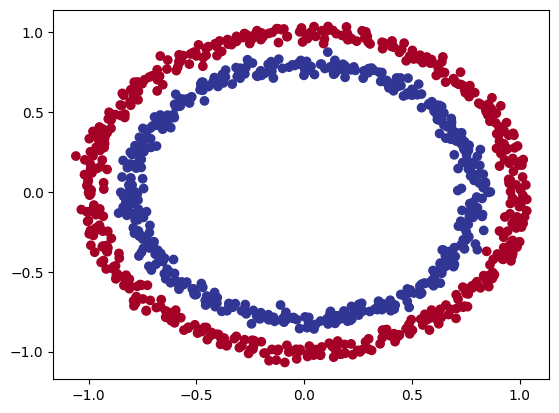

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(circles['X0'], circles['X1'], c=circles['labels'], cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [7]:
# Check the saheps of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working on
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 7.0288 - accuracy: 0.4960
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000


In [11]:
# Let's try and improve model by training longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y) # Actually, we must evaluate our model with test data set but it doesn't matter this time.

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Since we're working on a binary classification problem and our model is getting around %50 accuracy. It's performing as if it's guessing.

So let's add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creat a model with 2 dense layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# Evaluate the model_2
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6938607096672058, 0.5]

We added one more layer but our model is still performing around %50. This is very poor. 

## Improving our model

Let's look into our bag of trick tı see how we can improve our model.

1. Create a model - We might add more hiddin layers or increase the number of hiddin units(neuron). Or we might to change activation functions. 
2. Compiling a model - We might to chose different optimization functions such as Adam instead of SGD. Also, we might to change learining rate. 
3. Fitting a model - We might to fit our model for more  (training for longer)

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model (this time we will use 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add anotherlayer with 10 neurons
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# Evaluate the model_3
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.5100


[0.7024000287055969, 0.5099999904632568]

We changed the many things in model like adding more layers and more hiddin units, changing the optimizer to Adam instead of SGD. But we still getting same accuracy around %50. 

**Note:**Whenever your model is performing strangely ot there is something going on with your data you are not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model and inspect your model's predictions.

To visulize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X) and labels (y),
* Create a mashgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls.)

In [16]:
# import numpy
import numpy as np

# plot_decision_boundary function
def plot_decision_boundary(model, X, y):
  '''
  Plots the decision boundary created by a model predicting on X
  '''

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check fro multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


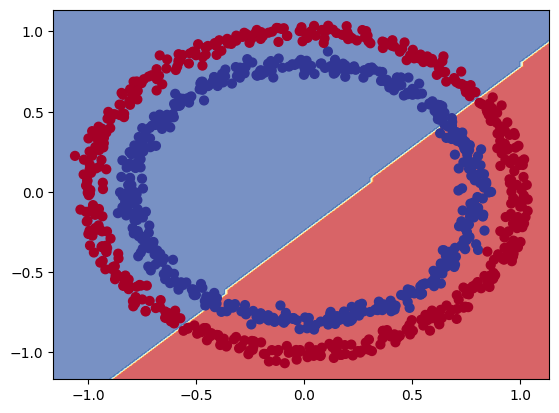

In [17]:
plot_decision_boundary(model=model_3, X=X, y=y)

In [18]:
# Let's see if our model can be used for a regression problem..

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = X_regression + 100

# Split our regression data into train and test sets
X_reg_train = X_regression[:150]
X_reg_test  = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

We compiled our model for a binary classification problem and we used binary cross entropy. But now, we are working on regression problem so let's change the model for regression problem.

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 391.7677 - mae: 391.7677
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 305.8273 - mae: 305.8273
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 220.8310 - mae: 220.8310
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 130.1037 - mae: 130.1037
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 50.5471 - mae: 50.5471
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 72.0207 - mae: 72.0207
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 70.7310 - mae: 70.7310
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 47.8792 - mae: 47.8792
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.1105 - mae: 47.1105
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 46.5553 - mae: 46.5553
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


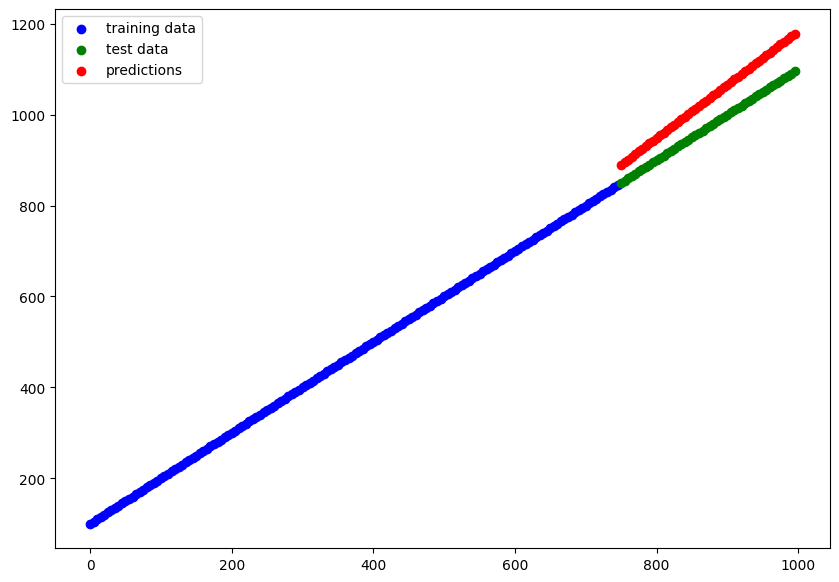

In [20]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='predictions')
plt.legend()
plt.show()

## The missing piece: Non-Linearity

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.4921 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4861 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4794 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4791 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4789 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4708 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4689 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4685 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4681 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4678 - accuracy: 0.4850
Epoch 11/

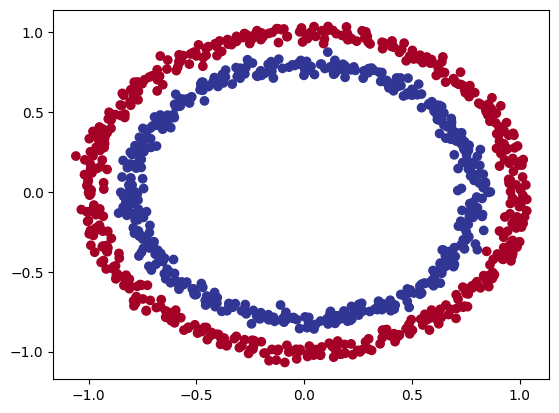

In [22]:
# Check out the our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show() 

313/313 [==============================] - 1s 2ms/step
doing binary classification


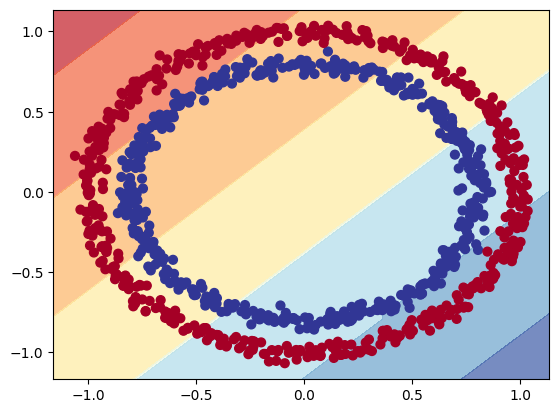

In [23]:
# Check the decision boundary for model_4
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8746 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8475 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8142 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7813 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7564 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7508 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7475 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7279 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6786 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6636 - accuracy: 0.4790
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


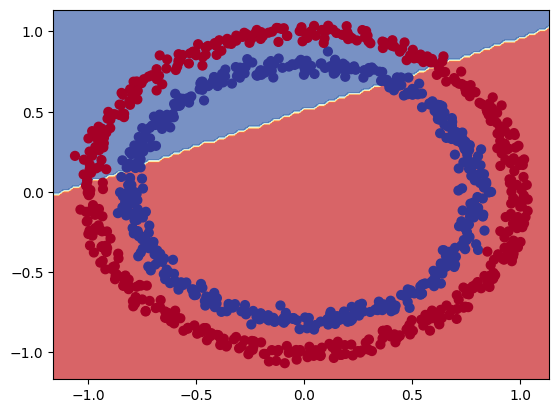

In [25]:
# Check the decision boundary for model_5
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try to improve our model. Adding two hidden layers with 4 neurons.

In [26]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
model_5.fit(X, y, epochs=250, verbose=0)

In [27]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9950


[0.05812089890241623, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification


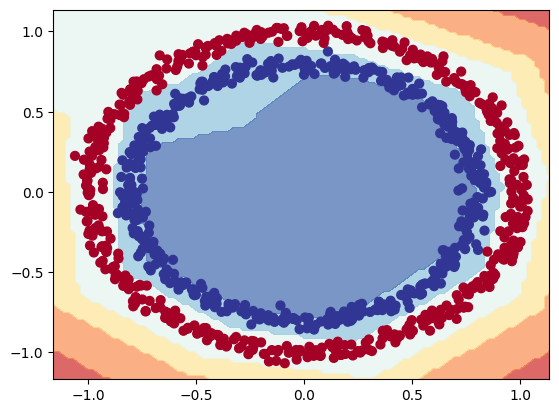

In [28]:
# Check the decision boundary for model_5
plot_decision_boundary(model_5, X, y)

The accuracy of model_5 is looks very good but something is wrong with the plot. Now, we will add one more activation function which is sigmoid for output layer.

In [29]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
model_6.fit(X, y, epochs=250, verbose=0)

In [30]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9990


[0.043064653873443604, 0.9990000128746033]

313/313 [==============================] - 1s 2ms/step
doing binary classification


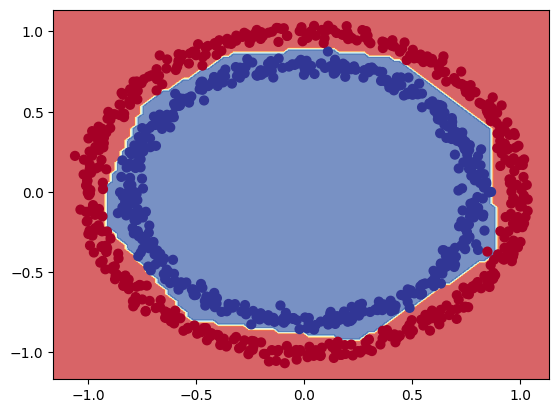

In [31]:
# Check the decision boundary for model_6
plot_decision_boundary(model_6, X, y)

**Note:** Actually, we are not really evaluating our model. Because our train and test data is same, as you notice above. 

**Note:** The combination of linear and non-linear functions is one of the key of neural networks. 

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [32]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

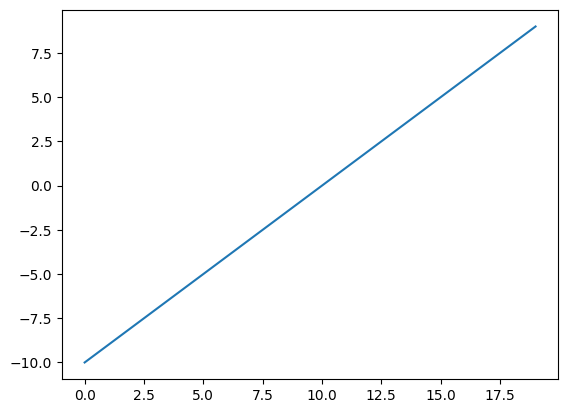

In [33]:
# Visualize the our toy tensor
plt.plot(A)
plt.show()

In [34]:
# Let's start by replicating sigmoid- sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [35]:
# Use the sigmoid function on the our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

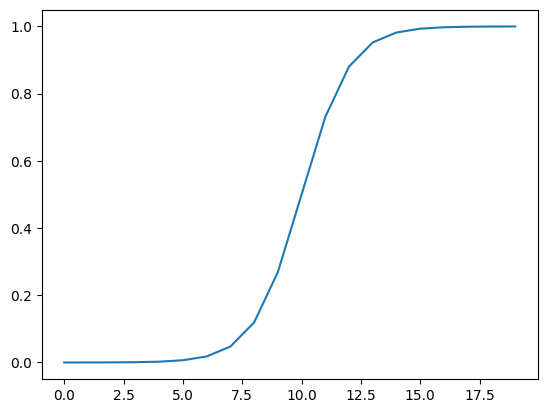

In [36]:
# Visualize the our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))
plt.show()

In [37]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass the our toy tensor to our custom relu function and compare both of them
print('Relu: ', relu(A).numpy())
print('Toy tensor: ', A.numpy())

Relu:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Toy tensor:  [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]


As you see, relu function return the all negatif values to zero and the positives return the same.

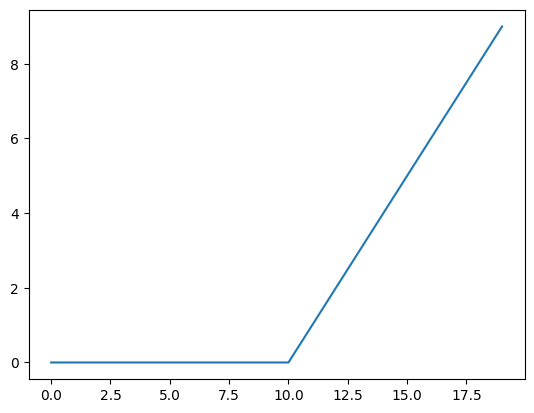

In [38]:
# Plot the relu modified tensor
plt.plot(relu(A))
plt.show()

In [39]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

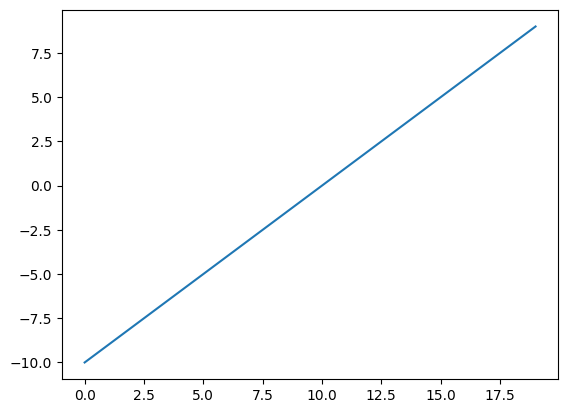

In [40]:
# Plot the linear modified tensor
plt.plot(tf.keras.activations.linear(A))
plt.show()

All results look like same, right? Let's check them.

In [41]:
# Does anyting change with linear function
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Yeah.. Everthing is same so linear function doesnt change anything. If you want to learn more about activation function, check this one: 

https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and improving our classification

So far, we've been training and testing our model on same dataset. However, in machine learning this is wrong. So let's create a training an test dataset. 

In [42]:
# Check how many example we have
len(X)

1000

In [43]:
# Split our data into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Let's check the shapes of datasets
print(f'X train shape:', X_train.shape)
print(f'X test shape:', X_test.shape)
print(f'y train shape:', y_train.shape)
print(f'y test shape:', y_test.shape)

X train shape: (800, 2)
X test shape: (200, 2)
y train shape: (800,)
y test shape: (200,)


In [64]:
# Let's create a new model and train it on train set and evaluate on test set

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.4525
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4762
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4988
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5600
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5800
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5063
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6837
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.6925
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7300
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.8037
Epoch 11/50
25/25 [

In [65]:
# Evaluate the model on the test data set
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9900


[0.03391656279563904, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


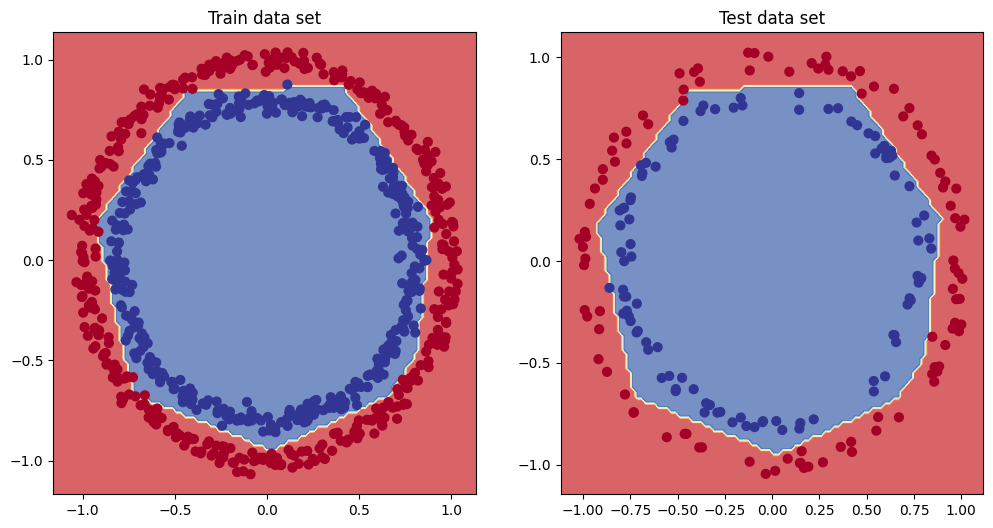

In [66]:
# Let's plot the decision boundary for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train data set')
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test data set')
plot_decision_boundary(model_7, X_test, y_test)

In [67]:
# Summarize the model_7
model_7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 4)                 12        
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves


In [68]:
# Convert history object to DataFrame
loss_df = pd.DataFrame(history.history)
loss_df

,loss,accuracy
0,0.698385,0.45250
1,0.694184,0.47625
2,0.692398,0.49875
3,0.690683,0.56000
4,0.686540,0.58000
5,0.678998,0.50625
6,0.660359,0.68375
7,0.634262,0.69250
8,0.592257,0.73000
9,0.544210,0.80375


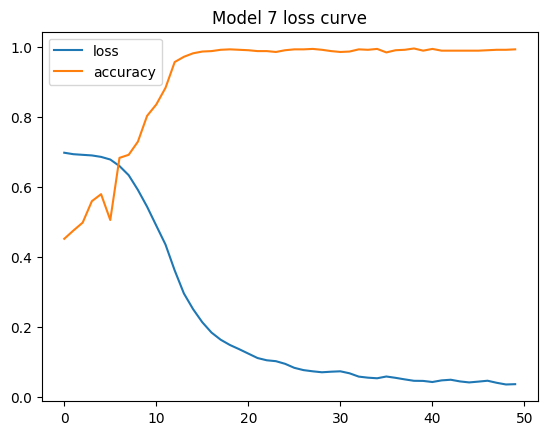

In [69]:
# Plot the loss curves
loss_df.plot()
plt.title('Model 7 loss curve')
plt.show()

**Note:** Fro many problems, the loss function going down it's mean the model is improving. (Predictions is going closer the actual values.)

## Finding the best learning rate

To find the ideal learning rate (th learning rate where the loss decreases the most during training) we're going to use following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model while its learning.
* Another model (we could use the same one as above, but we're praciticing building models here)
* A modified loss curves plot.

In [70]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Create a learining rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model (pass le_scheduler callback)
history_8 = model_8.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7050 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

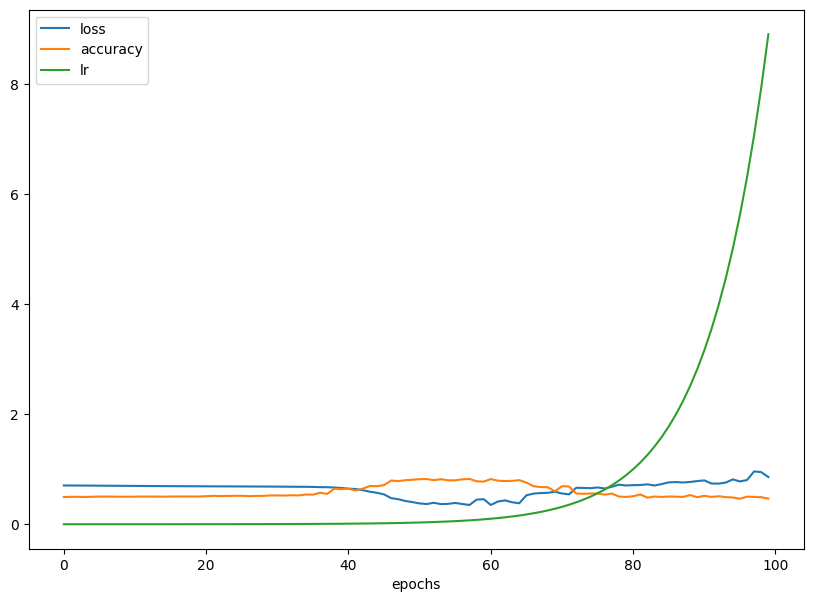

In [71]:
# Check out the history
pd.DataFrame(history_8.history).plot(figsize=(10, 7), xlabel='epochs')

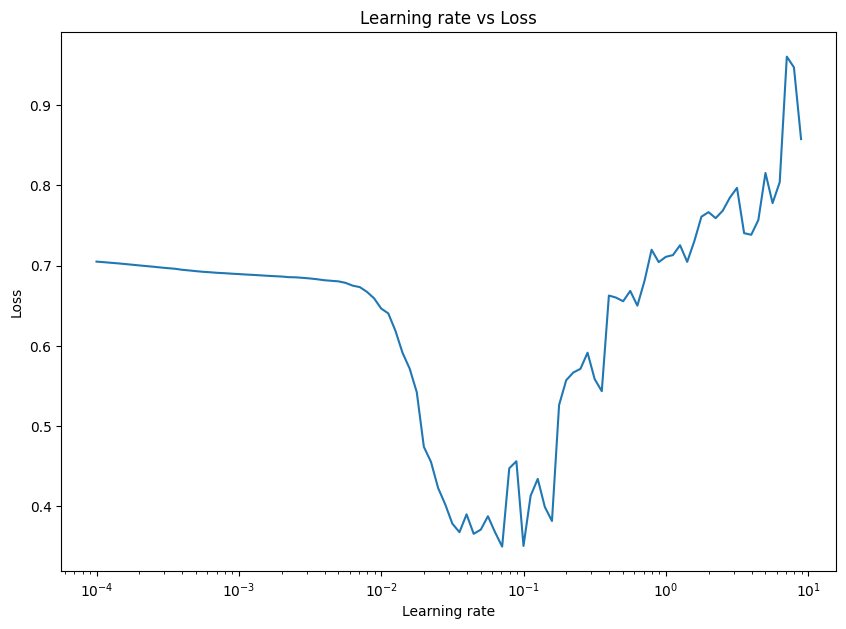

In [72]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_8.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')
plt.show()

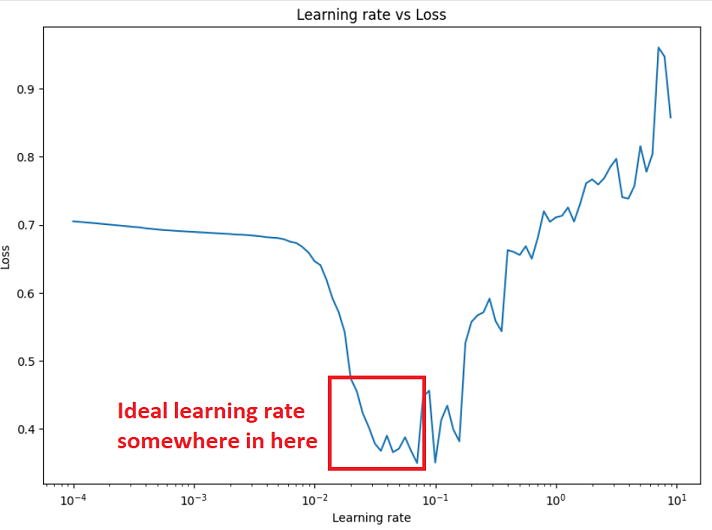

**Note:** Ideal learning rate is between the lowest point on curve and ten times smaller than this point.

Example of typical learning rates value:

* 1
* 0.1
* 0.01
* 0.001
* 0.0001

In [53]:
# Learning rate we used before (model_7)
10**-2

0.01

In [73]:
# Let's try using a higher **ideal** learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

# 4. Fit the model for 25 epochs (25 less than before)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7046 - accuracy: 0.5550
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5763
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5850
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.6025
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.6438
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.6850
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.6862
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7462
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.8050
Epoch 11/25
25/25 [

In [74]:
# Evaluate the model_9 on the test set
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9900


[0.061603840440511703, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


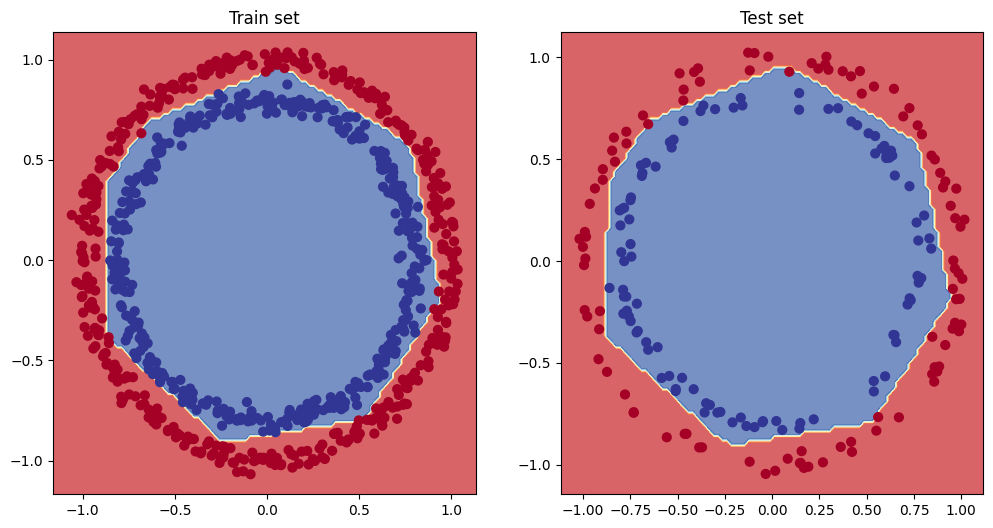

In [75]:
# Check the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_9, X_train, y_train)
plt.title('Train set')
plt.subplot(1, 2, 2)
plot_decision_boundary(model_9, X_test, y_test)
plt.title('Test set')
plt.show()

## More classification evaluation methods

There are a handful of other classification evaluation metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1 score
* Confusion matrix
* Classification report (from scikit-learn)

In [76]:
# Check the accuracy of our model_9
loss, accuracy = model_9.evaluate(X_test, y_test, verbose=0)

print('Model loss:', round(loss, 2))
print('Model accuracy:', round(accuracy, 2))

Model loss: 0.06
Model accuracy: 0.99


## How abot confusion matrix?

In [77]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_9.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

Opps. Someting wrong! Let's check the actual value and predictions

In [78]:
# Check the actual value
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [79]:
# Check the predictions
y_preds[:10]

array([[9.4659632e-01],
       [9.4659632e-01],
       [9.4659632e-01],
       [9.4659632e-01],
       [4.4880040e-02],
       [1.3046354e-04],
       [9.4659632e-01],
       [1.7402230e-05],
       [9.4659632e-01],
       [2.0428400e-02]], dtype=float32)

It looks like our prediction is probability form. We need to return this value to 0 or 1.

In [80]:
# Convert prediction probabilities to binary format and view the first 10 row
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [81]:
# Now we can create confusion matrix again
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

## How about we prettify our confusion matrix?

**Note:** the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix. If you want to learn more about scikit-learn plot_confusion_matrix, check this one:

https://scikit-learn.org/0.24/modules/generated/sklearn.metrics.plot_confusion_matrix.html

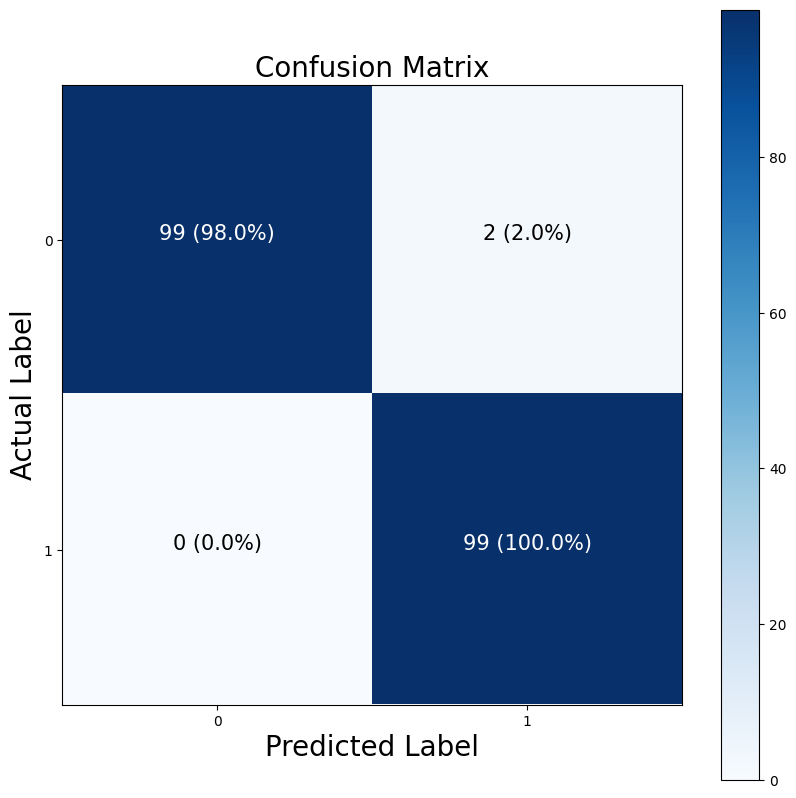

In [98]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


# Label the axes
ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='Actual Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,)

# Set the x-axis label to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)

## Working with larger example (Multiclass classification)

When you have more than two classes as an option, its known as **multi-class classification**. 
* This means if you have 3 different classes, it's multi-class classification.
* Also it means if you have 100 different classes, it's multi-class classification.

To practice multi-class calssification, we are going to build a neural network to classify images of different items of clothing. If you want to learn more about dataset, check this link:

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [163]:
# import dataset
from tensorflow.keras.datasets import fashion_mnist

# The data already has been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [113]:
# Show the first training example
print(f'First training data:\n{train_data[0]}\n')
print(f'Firs training label:\n{train_labels[0]}')

First training data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

The classes in the dataset as below:

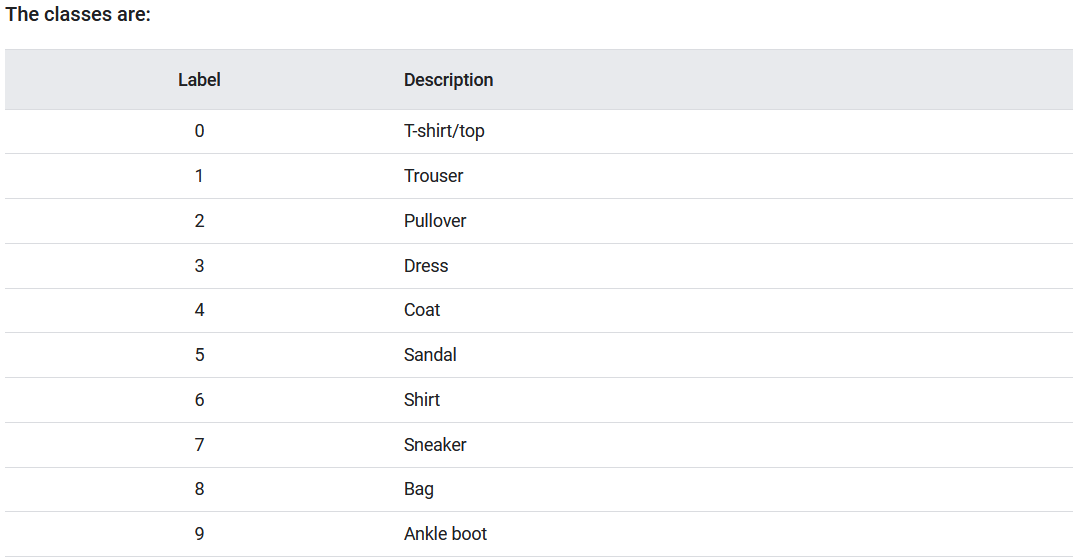

In [114]:
# Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

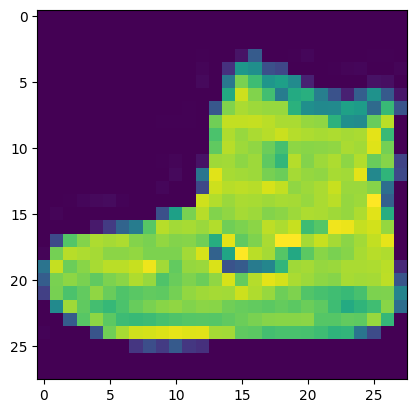

In [116]:
# Plot a single sample
plt.imshow(train_data[0])
plt.show()

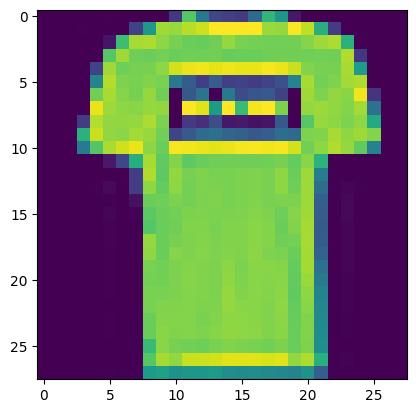

In [117]:
# Let's plot second example
plt.imshow(train_data[1])
plt.show()

In [118]:
# Check the second example's label
train_labels[1]

0

In [119]:
# Create a small list so we can index onto our training labels so they are human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes we have?
len(class_names)

10

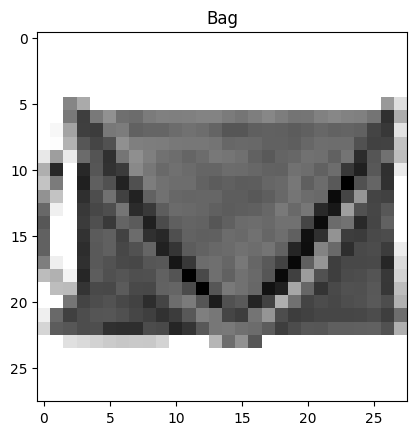

In [131]:
# Plot an example image and its label
index_of_choice = np.random.randint(1, 60000) # Create a random number
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
plt.show()

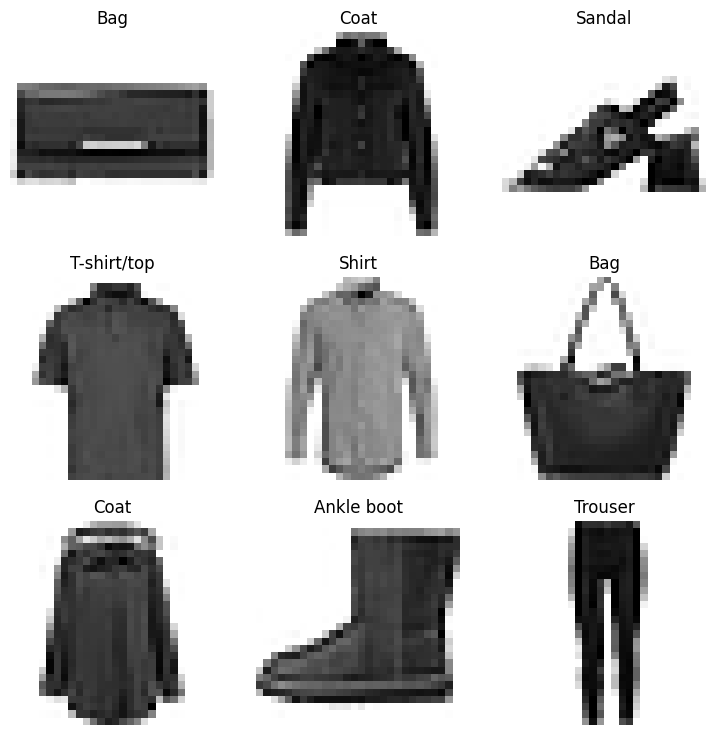

In [141]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(9, 9))
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similiar arcitecture of our binary classification model, however we're going to have to tweak a few things:
* Input shape = 28 x 28 (shape of image)
* Output shape = 10 (one per class for clothing)
* Loss funcion = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one hot encoded you can use CategoricalCrossentropy()
  * If your labels is integers you have to use SparseCategoricalCrossentropy()
  * Find out more: https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
* Output layer activaction = Softmax (not sigmoid)

In [159]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_10.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
non_norm_history = model_10.fit(train_data, 
                                tf.one_hot(train_labels, depth=10), 
                                epochs=10, 
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0007 - accuracy: 0.1962 - val_loss: 1.7195 - val_accuracy: 0.2482
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6793 - accuracy: 0.2548 - val_loss: 1.6527 - val_accuracy: 0.2655
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6500 - accuracy: 0.2688 - val_loss: 1.6388 - val_accuracy: 0.2618
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5863 - accuracy: 0.3038 - val_loss: 1.5469 - val_accuracy: 0.3160
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5508 - accuracy: 0.3217 - val_loss: 1.5578 - val_accuracy: 0.2911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5419 - accuracy: 0.3164 - val_loss: 1.5240 - val_accuracy: 0.3446
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5431 - accuracy: 0.3146 - val_loss: 1.5210 - val_accuracy:

In [160]:
# Check the model summary
model_10.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 4)                 3140      
                                                                 
 dense_57 (Dense)            (None, 4)                 20        
                                                                 
 dense_58 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Check the train data min and max values
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled or normalized, this means they like to numbers between 0 and 1.

In [164]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [165]:
# Let's check the maxiumum and maximum values of the normalized data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [166]:
# Let's modeling with scaled data and see whats happening

# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
norm_history = model_11.fit(train_data_norm, 
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4935 - accuracy: 0.4371 - val_loss: 1.0211 - val_accuracy: 0.6776
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8497 - accuracy: 0.7168 - val_loss: 0.7764 - val_accuracy: 0.7198
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7149 - accuracy: 0.7482 - val_loss: 0.7379 - val_accuracy: 0.7371
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6785 - accuracy: 0.7593 - val_loss: 0.6969 - val_accuracy: 0.7506
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6603 - accuracy: 0.7666 - val_loss: 0.6848 - val_accuracy: 0.7652
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6440 - accuracy: 0.7742 - val_loss: 0.6935 - val_accuracy: 0.7536
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6326 - accuracy: 0.7783 - val_loss: 0.6623 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (between 0 and 1).

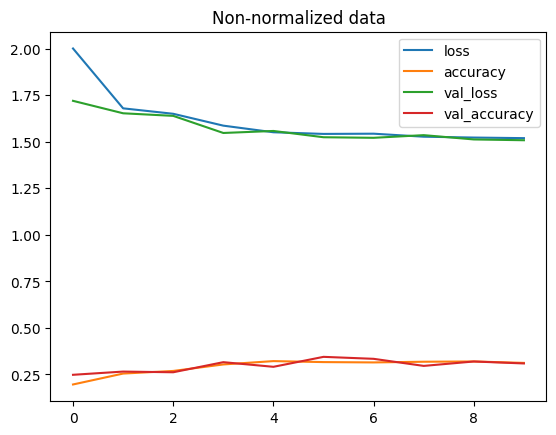

In [169]:
# Plot the non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
plt.show()

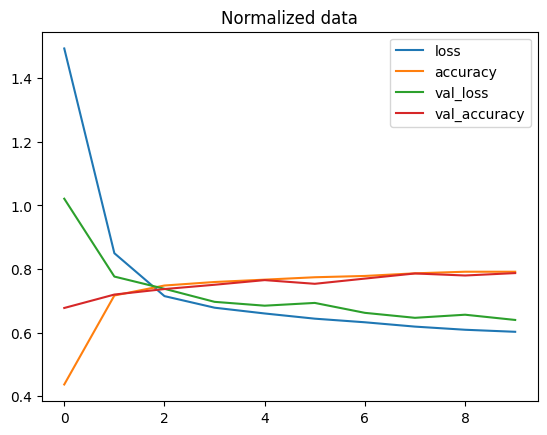

In [171]:
# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title='Normalized data')
plt.show()

**Note:** The same model with even slightly different data can produce dramatically different results. When you you are comparing models, it's important to make sure you're comparing them on the same criteria (same architechture but different data or same data but different architecture). 

## Finding the ideal learning rate

In [173]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create the learining rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
find_lr_history = model_12.fit(train_data_norm, 
             train_labels,
             epochs=40,
             validation_data=(test_data_norm, test_labels),
             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 2ms/step - loss: 1.4076 - accuracy: 0.4882 - val_loss: 1.1060 - val_accuracy: 0.5893 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9716 - accuracy: 0.6317 - val_loss: 0.8882 - val_accuracy: 0.6792 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8018 - accuracy: 0.6972 - val_loss: 0.7515 - val_accuracy: 0.7220 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7136 - accuracy: 0.7242 - val_loss: 0.7017 - val_accuracy: 0.7261 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6792 - accuracy: 0.7329 - val_loss: 0.6955 - val_accuracy: 0.7289 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6584 - accuracy: 0.7423 - val_loss: 0.6704 - val_accuracy: 0.7475 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

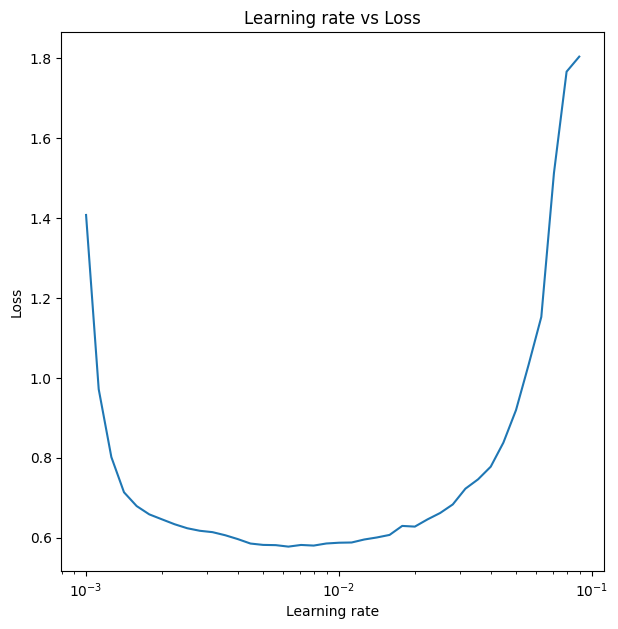

In [177]:
# Plot the learning rate versus the loss
lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(7, 7))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')
plt.show()

In [185]:
# Let's  refit the model with the ideal learining rate

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=['accuracy']
)

# Fit the model
history_13 = model_13.fit(train_data_norm, 
             train_labels,
             epochs=20,
             validation_data=(test_data_norm, test_labels)
             )

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8446 - accuracy: 0.6853 - val_loss: 0.6614 - val_accuracy: 0.7775
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6405 - accuracy: 0.7779 - val_loss: 0.6427 - val_accuracy: 0.7878
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6129 - accuracy: 0.7901 - val_loss: 0.6412 - val_accuracy: 0.7758
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5979 - accuracy: 0.7969 - val_loss: 0.6132 - val_accuracy: 0.7929
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5916 - accuracy: 0.7977 - val_loss: 0.6157 - val_accuracy: 0.7925
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5838 - accuracy: 0.8013 - val_loss: 0.6325 - val_accuracy: 0.7900
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5798 - accuracy: 0.8027 - val_loss: 0.6137 - val_accuracy:

## Evaluation our multiclass classification model

To evaluate our multiclass classification model we could:
* Evaluate its performance using other classification matrics (such as confusion matrix)
* Assses some of its predictions (through visualizations)
* Improve its results (by traning it for longer or changing the architecture)
* Save and export it foru se in an aplication

Let's go through the top 2..

In [204]:
# make a confusion matrix function 
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # Label the axes
  ax.set(title='Confusion Matrix',
          xlabel='Predicted Label',
          ylabel='Actual Label',
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels,)

  # Set the x-axis label to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)

In [191]:
# Make predictions
y_probs = model_13.predict(test_data_norm) # probs is short for prediction probabilities

# Viev the first five predictions probabilities
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.06217507e-10, 4.37741964e-19, 2.43433902e-11, 1.15288823e-09,
        8.03012554e-08, 1.82410777e-01, 6.00839343e-08, 6.25477657e-02,
        4.16119234e-04, 7.54625142e-01],
       [3.69690591e-04, 1.36736480e-08, 7.05369830e-01, 3.65967899e-05,
        1.34658143e-01, 1.33212795e-23, 1.59564242e-01, 0.00000000e+00,
        1.42769204e-06, 0.00000000e+00],
       [5.38419681e-06, 9.97770369e-01, 5.92617318e-04, 8.94133293e-04,
        7.27832201e-04, 6.66178178e-18, 9.63029470e-06, 9.95177772e-24,
        1.95373079e-10, 2.20617453e-36],
       [2.19504955e-06, 9.96894360e-01, 1.18587857e-04, 2.17082910e-03,
        8.09764315e-04, 1.91902858e-16, 4.18410491e-06, 1.18025878e-19,
        4.97194175e-10, 9.13270537e-32],
       [1.41101077e-01, 1.55332998e-06, 1.03883326e-01, 7.67574599e-03,
        1.81719121e-02, 7.21480486e-10, 7.26533771e-01, 1.40664309e-20,
        2.63250549e-03, 4.43489907e-30]], dtype=float32)

In [196]:
# Convert the all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first five predictions
y_preds[:5]

array([9, 2, 1, 1, 6])

In [201]:
# Check the first five actual labels
test_labels[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [202]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[810,   2,  13,  64,   2,   4,  94,   0,  11,   0],
       [  0, 949,  13,  30,   4,   1,   2,   0,   1,   0],
       [ 22,   1, 628,  10, 188,   1, 148,   0,   2,   0],
       [ 48,  10,  12, 833,  35,   2,  52,   3,   5,   0],
       [  1,   2,  87,  28, 788,   0,  87,   0,   7,   0],
       [  0,   0,   0,   0,   0, 903,   0,  40,   6,  51],
       [199,   2,  85,  38, 138,   4, 516,   0,  18,   0],
       [  0,   0,   0,   0,   0,  44,   0, 903,   1,  52],
       [  3,   2,   1,   8,   5,  15,  51,   6, 909,   0],
       [  0,   0,   0,   0,   0,  24,   0,  35,   1, 940]])

This is not human-readable, that's why we created make_confusion_matrix function. Let's check our function.

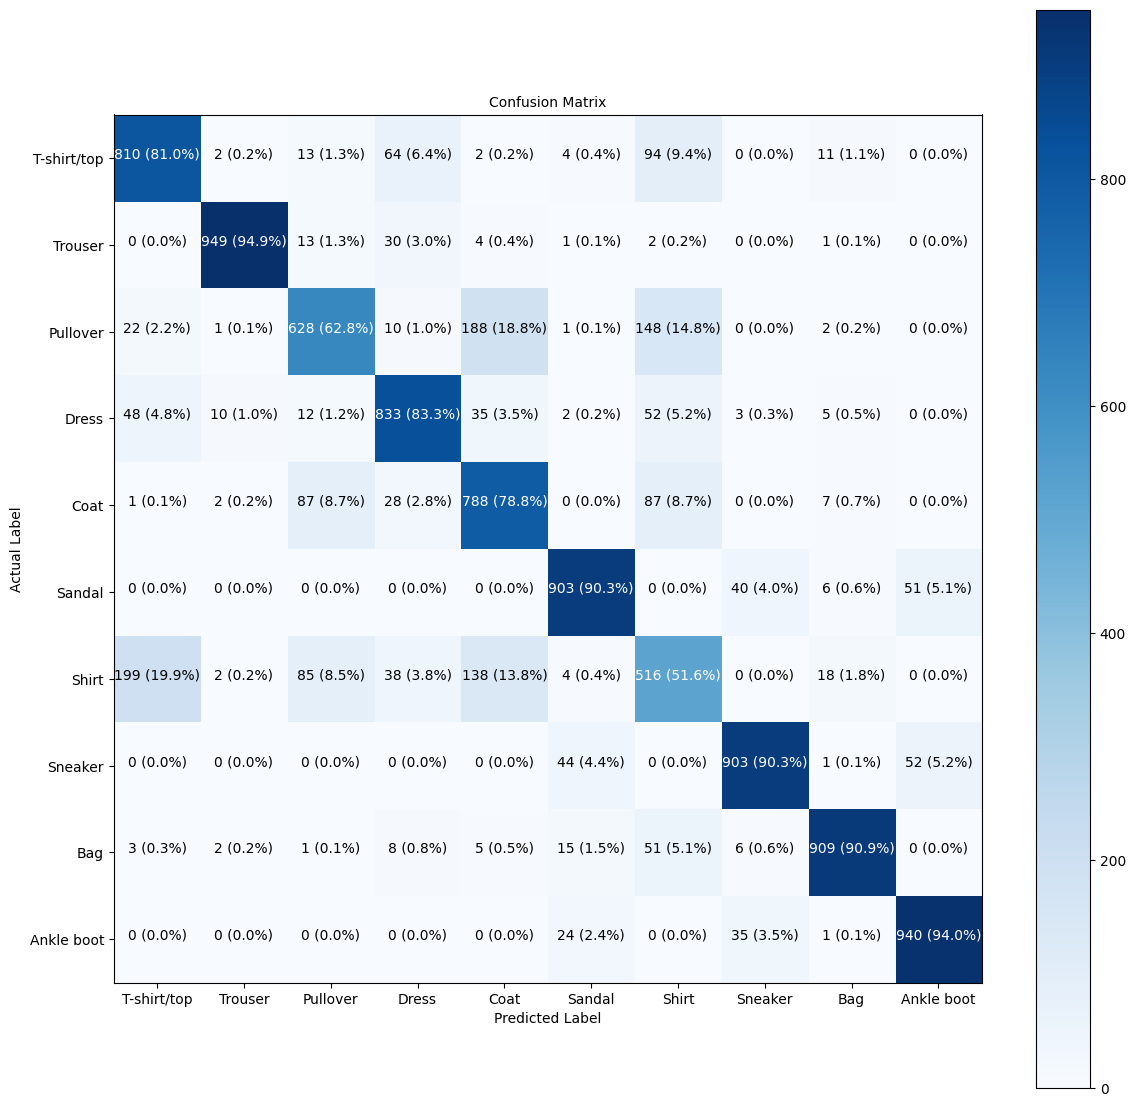

In [208]:
# Make a prettier confusion matrix
make_confusion_matrix(test_labels, 
                      y_preds,
                      classes=class_names,
                      figsize=(14, 14),
                      text_size=10)